In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import networkx as nx

import graph_delineator.delineate as gd

In [2]:
# Define MERIT data directories
merit_dirs = {
    'basins': Path('/nas/cee-ice/data/MERIT'),
    'flow_dir': Path('/nas/cee-ice/data/MERIT-Hydro/processed/dir/'),
    'flow_acc': Path('/nas/cee-ice/data/MERIT-Hydro/processed/upg/')
}
gauges_csv = Path('/nas/cee-water/cjgleason/ted/graph_delineator/data/demo.csv')
output_dir = Path('/nas/cee-water/cjgleason/ted/graph_delineator/data/demo')

In [3]:
gd.delineate_basins(
    gauges_path = gauges_csv,
    merit_dirs = merit_dirs, 
    max_area = 500,
    consolidate = True,
    preserve_gauges = True,
    output_dir = output_dir,
    save_plots = True,
)


GRAPH-BASED WATERSHED DELINEATION
Data output directory: /nas/cee-water/cjgleason/ted/graph_delineator/data/demo


Basin 7: 100%|██████████| 1/1 [00:24<00:00, 24.76s/it]



COMPLETE


In [4]:
# Read in the subbasin and gauge outputs from the delineation (geoparquet format)
subbasins = gpd.read_parquet('/nas/cee-water/cjgleason/ted/graph_delineator/data/demo/subbasins/USGS-01578310_subbasins.parquet')
subbasins

,id,geometry,area_km2,uparea_km2,node_type,is_gauge,nextdown
0,73005596,"POLYGON ((-78.57458 40.30458, -78.57458 40.307...",299.908022,299.908022,original,False,USGS-01556000
1,73005555,"POLYGON ((-77.56042 40.92042, -77.56042 40.921...",244.252083,244.252083,original,False,73005401
2,73005544,"POLYGON ((-78.40625 40.81292, -78.40625 40.814...",422.608973,422.608973,original,False,USGS-01542500
3,73002036,"MULTIPOLYGON (((-75.10208 42.80542, -75.10208 ...",269.171027,269.171027,original,False,73001995
4,73003655,"POLYGON ((-77.89708 41.71208, -77.89625 41.712...",481.161533,481.161533,original,False,73003544
...,...,...,...,...,...,...,...
215,USGS-01574500,"POLYGON ((-76.98458 39.80792, -76.98458 39.808...",194.767032,194.767032,gauge,True,USGS-01575500
216,USGS-01572025,"POLYGON ((-76.50208 40.62792, -76.50208 40.629...",299.444031,299.444031,gauge,True,USGS-01572190
217,USGS-01546400,"POLYGON ((-77.90208 40.75542, -77.90208 40.756...",150.114919,150.114919,gauge,True,USGS-01546500
218,USGS-01557500,"POLYGON ((-78.29375 40.74375, -78.29292 40.743...",115.606835,115.606835,gauge,True,USGS-01558000


In [5]:
gauges = gpd.read_parquet('/nas/cee-water/cjgleason/ted/graph_delineator/data/demo/gauges/USGS-01578310_gauges.parquet')
gauges

,id,geometry,lat,lng,area_km2,uparea_km2
0,USGS-01509000,POINT (-76.15939 42.60267),42.602667,-76.159389,264.627563,757.690269
1,USGS-01505000,POINT (-75.51056 42.67861),42.678611,-75.510556,216.447805,679.254638
2,USGS-01510000,POINT (-75.89972 42.54111),42.541111,-75.899722,376.972399,376.972399
3,USGS-01553025,POINT (-76.89 41.10806),41.108056,-76.890000,464.086764,16835.762470
4,USGS-01551500,POINT (-76.99661 41.23612),41.236116,-76.996608,267.546241,14681.365358
...,...,...,...,...,...,...
123,USGS-01574500,POINT (-76.85331 39.87871),39.878710,-76.853307,194.767032,194.767032
124,USGS-01572025,POINT (-76.40218 40.53259),40.532590,-76.402179,299.444031,299.444031
125,USGS-01546400,POINT (-77.8275 40.83367),40.833673,-77.827501,150.114919,150.114919
126,USGS-01557500,POINT (-78.23362 40.68367),40.683673,-78.233624,115.606835,115.606835


<Axes: >

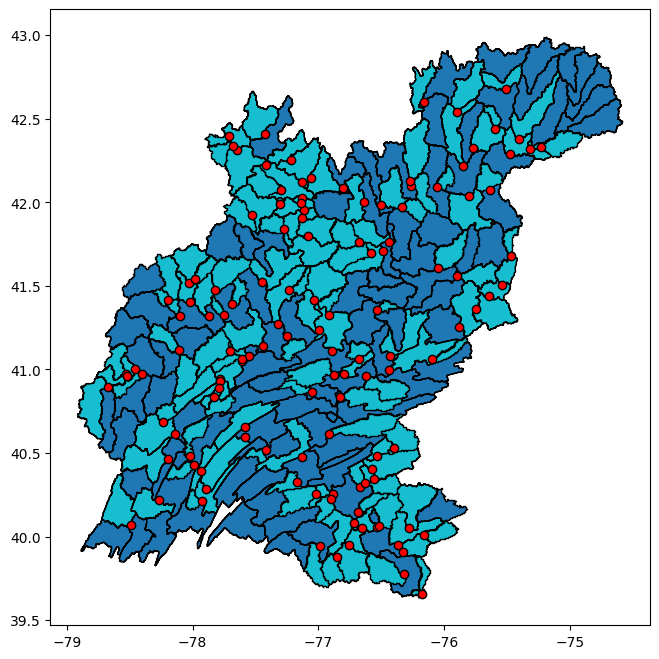

In [6]:
fix, ax = plt.subplots(figsize=(8,8))

subbasins.plot('is_gauge', edgecolor="black", ax=ax)
gauges.plot(color='red', edgecolor="black", ax=ax)